### K-Means Clustering algorithm from scratch

#### 1D

In [10]:
from numpy import ndarray
import numpy as np
import matplotlib.pyplot as plt

In [126]:
# NOTE: This class is not finished yet
class KMeans:
    def __init__(self, n_clusters: int):
        self.n_clusters = n_clusters

    def fit(self, X, y=None):
        pass
    
    def plot_clusters(self, X, centroids, clusters):
        plt.figure(figsize=(8, 0.5))
        plt.scatter(X, np.zeros(X.shape[0]), c=clusters)
        # plt.scatter(centroids, np.zeros(self.n_clusters), marker='*')
        
        for i, x in enumerate(centroids):
            plt.axvline(x=x[0], c=i)
        plt.show()

In [37]:
def plot_clusters(X, centroids, clusters):
    plt.figure(figsize=(8, 0.5))
    plt.scatter(X, np.zeros(X.shape[0]), c=clusters)
    # plt.scatter(centroids, np.zeros(self.n_clusters), marker='*')
    
    for x in centroids:
        plt.axvline(x=x[0])
    plt.show()

In [84]:
X = np.array([[0], [1], [2], [3], [30],[32], [33], [51], [52], [48], [55], [57]])

n_clusters = 3

np.random.seed(4)
centroids0 = np.random.randint(low=X.min(), high=X.max(), size=(n_clusters, X.shape[1]))
print(centroids0)

[[46]
 [55]
 [ 5]]


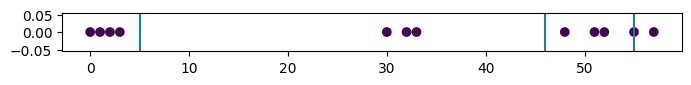

In [85]:
clusters0 = np.zeros(X.shape)
plot_clusters(X, centroids0, clusters0)

In [95]:
clusters1 = abs(X - centroids0.T).argmin(axis=1)
print(clusters1)

[2 2 2 2 0 0 0 1 1 0 1 1]


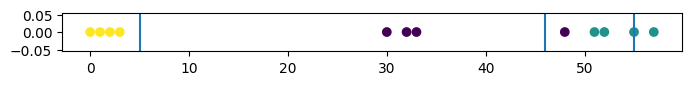

In [87]:
plot_clusters(X, centroids0, clusters1)

In [105]:
def new_centroids(X, clusters, n_clusters):
    centroids = []
    for i in range(n_clusters):
        c = X[clusters == i].mean()
        centroids.append([c])
    return np.array(centroids)

In [106]:
centroids1 = new_centroids(X, clusters1, n_clusters)

In [113]:
all(centroids1 == centroids0)

False

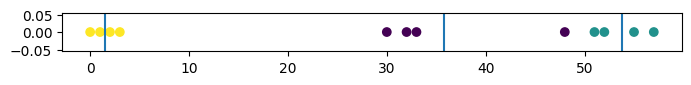

In [108]:
plot_clusters(X, centroids1, clusters1)

In [109]:
clusters2 = abs(X - centroids1.T).argmin(axis=1)
print(clusters2)

[2 2 2 2 0 0 0 1 1 1 1 1]


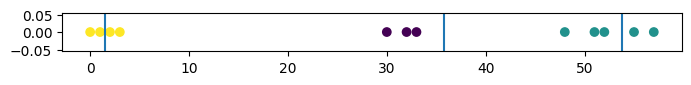

In [110]:
plot_clusters(X, centroids1, clusters2)

In [114]:
centroids2 = new_centroids(X, clusters2, n_clusters)

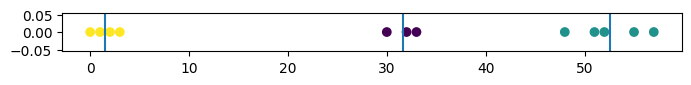

In [117]:
plot_clusters(X, centroids2, clusters2)

In [116]:
all(centroids2 == centroids1)

False

In [118]:
clusters3 = abs(X - centroids2.T).argmin(axis=1)
print(clusters3)

[2 2 2 2 0 0 0 1 1 1 1 1]


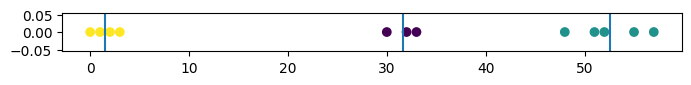

In [119]:
plot_clusters(X, centroids2, clusters3)

In [120]:
centroids3 = new_centroids(X, clusters3, n_clusters)

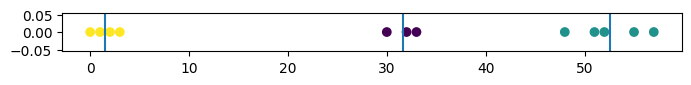

In [121]:
plot_clusters(X, centroids3, clusters3)

In [123]:
all(centroids3 == centroids2)

True

In [125]:
print(centroids0.tolist())
print(centroids1.tolist())
print(centroids2.tolist())
print(centroids3.tolist())

[[46], [55], [5]]
[[35.75], [53.75], [1.5]]
[[31.666666666666668], [52.6], [1.5]]
[[31.666666666666668], [52.6], [1.5]]


#### 2D

In [160]:
def plot_clusters(X, centroids, clusters):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=clusters)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*')
    
    # for x in centroids:
    #     plt.axvline(x=x[0])
    plt.show()

In [161]:
X = np.array([[0, 1], [1, 3], [2, 1], [3, 4], [30, 32],[32, 29], [33, 35], [51, 56], [52, 50], [48, 45], [55, 60], [57, 58]])

n_clusters = 3

np.random.seed(3)
centroids0 = np.random.uniform(low=X.min(), high=X.max(), size=(n_clusters, X.shape[1]))
print(centroids0)

[[33.04787415 42.48886936]
 [17.45428433 30.64965631]
 [53.57681726 53.77758534]]


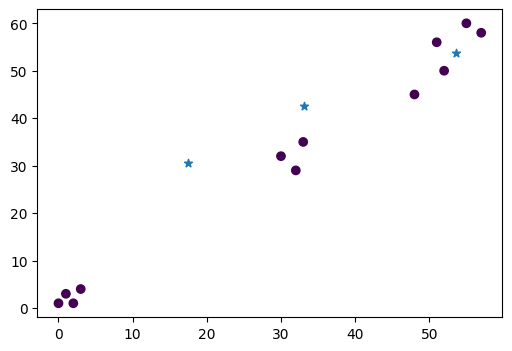

In [162]:
clusters0 = np.zeros(X.shape[0])
plot_clusters(X, centroids0, clusters0)

In [177]:
def euc_dist(point, centroids):
    distances = []
    for centroid in centroids:
        temp = point - centroid
        distances.append(np.sqrt(np.dot(temp.T, temp)))
    return np.array(distances)


In [178]:
def new_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = euc_dist(point, centroids)
        clusters.append(distances.argmin())
    return np.array(clusters)

In [180]:
clusters1 = new_clusters(X, centroids0)

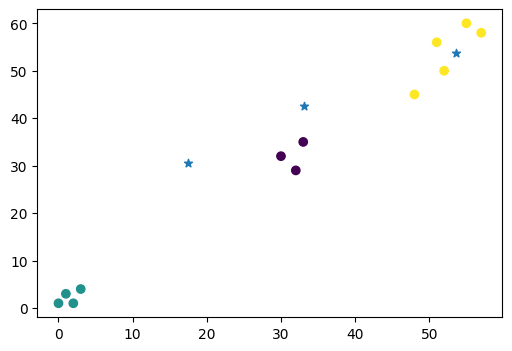

In [181]:
plot_clusters(X, centroids0, clusters1)

In [203]:
def new_centroids(X, clusters, n_clusters):
    centroids = []
    for i in range(n_clusters):
        c = X[clusters == i].mean(axis=0)
        centroids.append(c)
    return np.array(centroids)

In [205]:
centroids1 = new_centroids(X, clusters1, n_clusters)

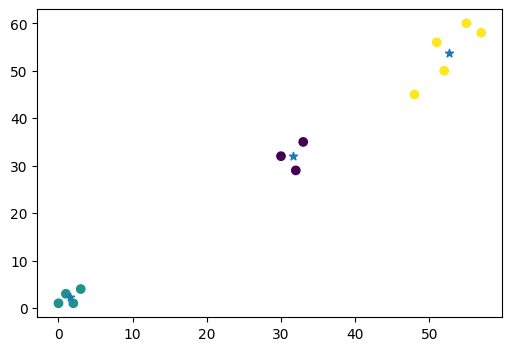

In [206]:
plot_clusters(X, centroids1, clusters1)

In [208]:
np.all(centroids1 == centroids0)

np.False_

In [209]:
clusters2 = new_clusters(X, centroids1)

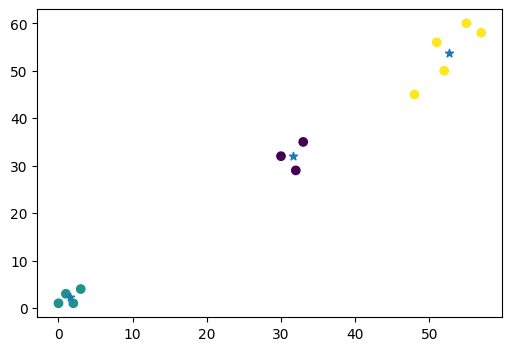

In [212]:
plot_clusters(X, centroids1, clusters2)

In [211]:
centroids2 = new_centroids(X, clusters2, n_clusters)

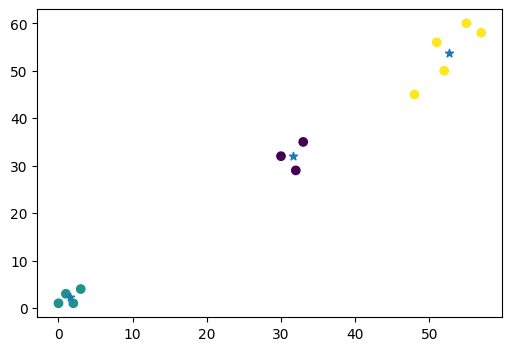

In [213]:
plot_clusters(X, centroids2, clusters2)

In [214]:
np.all(centroids2 == centroids1)

np.True_

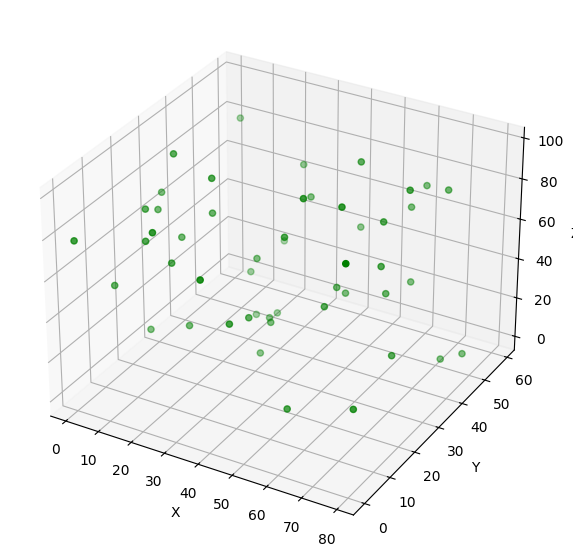

In [217]:
z = np.random.randint(100, size=50)
x = np.random.randint(80, size=50)
y = np.random.randint(60, size=50)

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

ax.scatter3D(x, y, z, color='green')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [2]:
from sklearn.datasets import make_blobs

In [8]:
X, y = make_blobs(n_features=3, n_samples=100)
X = X.round(2)
import pandas as pd

pd.DataFrame(data=X, columns=['X', 'Y', 'Z']).to_csv('3d_points.csv', index=False)

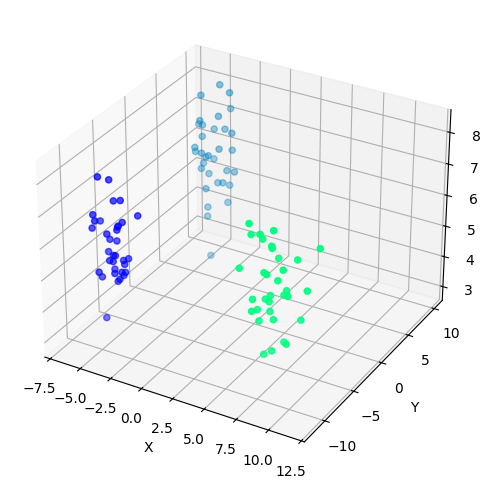

In [232]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection="3d")

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='winter')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_features=2, n_samples=200, centers=3)
X = X.round(2)

import pandas as pd
pd.DataFrame(data=X, columns=['X', 'Y']).to_csv('2d_points.csv', index=False)

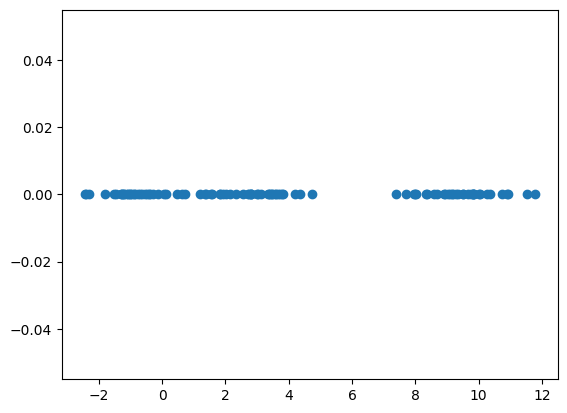

In [14]:
points_1d = pd.read_csv('1d_points.csv').to_numpy()

plt.scatter(points_1d[:, 0], np.zeros(points_1d.shape[0]))
plt.show()